In [4]:
using ReinforcementLearningCore

using RLIntro
using RLIntro.BlackJack

┌ Info: Precompiling RLIntro [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1273


In [5]:
env = BlackJackEnv(;is_exploring_start=true)

ns, na = length(get_observation_space(env)), length(get_action_space(env))

(220, 2)

In [10]:
agent = Agent(
    policy=ExploringStartPolicy(
        policy=QBasedPolicy(
            learner=MonteCarloLearner(
                approximator=TabularApproximator(;n_state=ns, n_action=na),
                kind=EVERY_VISIT,
                returns=CachedSampleAvg{Tuple{Int, Int}}()
                ),
            explorer=GreedyExplorer()
        ),
        actions=1:na
    ),
    trajectory=EpisodicCompactSARTSATrajectory()
)

run(agent, env, StopAfterEpisode(1000000; is_show_progress=false))

Agent{ExploringStartPolicy{QBasedPolicy{MonteCarloLearner{RLIntro.EveryVisit,TabularApproximator{2,Array{Float64,2}},CachedSampleAvg{Tuple{Int64,Int64}},RLIntro.NoSampling},EpsilonGreedyExplorer{:linear,Random.MersenneTwister}},UnitRange{Int64},Random.MersenneTwister},EpisodicCompactSARTSATrajectory{Tuple{Int64,Int64,Float32,Bool,Int64,Int64},Tuple{Array{Float32,1},Array{Bool,1},Array{Int64,1},Array{Int64,1}}},ReinforcementLearningBase.DefaultPlayer}(ExploringStartPolicy{QBasedPolicy{MonteCarloLearner{RLIntro.EveryVisit,TabularApproximator{2,Array{Float64,2}},CachedSampleAvg{Tuple{Int64,Int64}},RLIntro.NoSampling},EpsilonGreedyExplorer{:linear,Random.MersenneTwister}},UnitRange{Int64},Random.MersenneTwister}(QBasedPolicy{MonteCarloLearner{RLIntro.EveryVisit,TabularApproximator{2,Array{Float64,2}},CachedSampleAvg{Tuple{Int64,Int64}},RLIntro.NoSampling},EpsilonGreedyExplorer{:linear,Random.MersenneTwister}}(MonteCarloLearner{RLIntro.EveryVisit,TabularApproximator{2,Array{Float64,2}},Cach

In [13]:
using Plots

In [20]:
agent.policy.policy.learner.approximator.table

2×220 Array{Float64,2}:
 0.0  0.0  -0.271266  -0.536123  -0.327335  …  -0.85857  0.0188902  -1.0     
 0.0  0.0  -0.764565  -0.789311  -0.762019      0.4187   0.89265     0.889398

In [28]:
q_value = reshape(agent.policy.policy.learner.approximator.table, 2, 2, 11, 10)
p1 = map(x -> x.I[1], argmax(q_value[:, 1, :, :], dims=1))
p2 = map(x -> x.I[1], argmax(q_value[:, 2, :, :], dims=1));

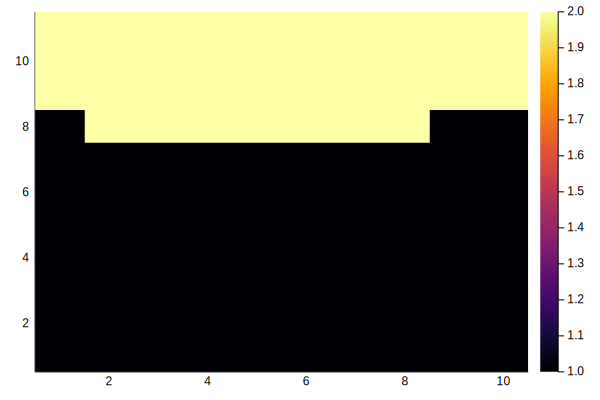

In [30]:
heatmap(dropdims(p1, dims=1))

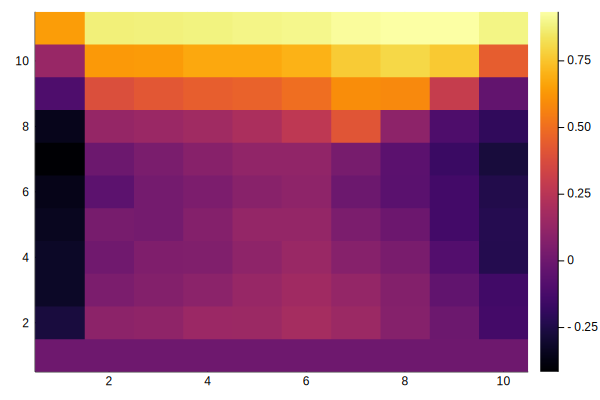

In [31]:
heatmap(dropdims(maximum(q_value[:, 1, :, :]; dims=1), dims=1))

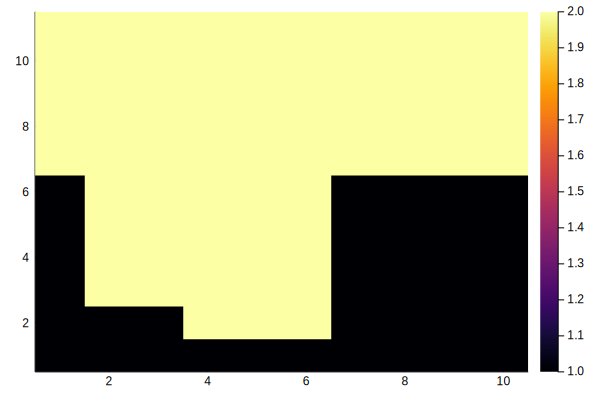

In [32]:
heatmap(dropdims(p2, dims=1))

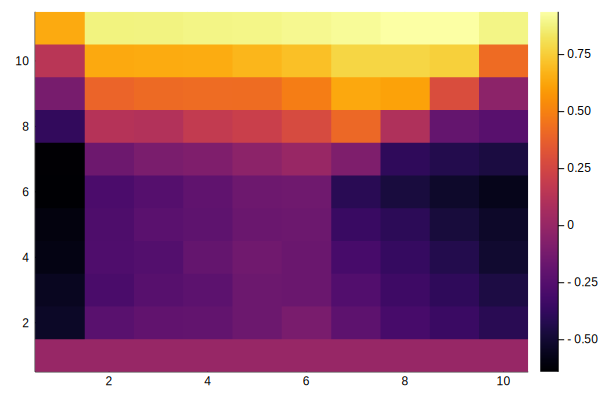

In [33]:
heatmap(dropdims(maximum(q_value[:, 2, :, :]; dims=1), dims=1))